In [1]:
import numpy as np
import pandas as pd
import os 

import pickle
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import soundfile as sf

import pickle

ydata= pd.read_csv("/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/Y_train_ofTdMHi.csv")
path = "/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/X_train"

2023-12-07 20:08:47.725806: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-07 20:08:47.899663: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-07 20:08:47.900949: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 20:08:50.883532: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

# Function to extract features from an audio file
def extract_features(file_path):
    audio, sample_rate = sf.read(file_path) 
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    
    return audio, sample_rate,mfccs, mfccs_processed

# Load your dataset
# You should replace 'path_to_train_folder' with the path to your training dataset
train_files = [os.path.join(path, file) for file in os.listdir(path)]
train_id = list(ydata.id)
train_labels = list(ydata.pos_label)

print(train_labels[0],train_id[0], train_files[0]) ## Ça ne correspond pas, il y a un problème ici. 


0.0 00000-JAM.wav /home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/X_train/06930-BON.wav


In [29]:
audio, sample_rate,mfccs, mfccs_processed = extract_features(train_files[0])

/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Apprentissage_Statistique_Panloup/Data_challenge/X_train/06930-BON.wav


In [41]:
import matplotlib.pyplot as plt

#plt.plot(audio)
audio.shape

(51200,)

In [ ]:

train_features = []

for file in train_files:
    data = extract_features(file)
    if data is not None:
        train_features.append(data)


In [5]:

# Enregistrement des données dans un fichier
with open('train_features.pkl', 'wb') as fichier:
    pickle.dump(train_features, fichier)
# Enregistrement des données dans un fichier
with open('train_labels.pkl', 'wb') as fichier1:
    pickle.dump(train_labels, fichier1)



In [6]:


# Chargement des données depuis le fichier
with open('train_features.pkl', 'rb') as fichier:
    train_features = pickle.load(fichier)

# Chargement des données depuis le fichier
with open('train_labels.pkl', 'rb') as fichier1:
    train_labels = pickle.load(fichier1)

In [7]:
# Convert to numpy arrays
X_train = np.array(train_features)
y_train = np.array(train_labels)

## 1)  Reseau de neuroune

In [9]:
from sklearn.model_selection import train_test_split

# First split to separate out the test set
train_val_data, test_data, train_val_labels, test_labels = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# Now split the remaining data into training and validation sets
train_data, eval_data, train_labels, eval_labels = train_test_split(
    train_val_data, train_val_labels, test_size=0.25, random_state=42) 


In [11]:
print(len(train_data))
print(len(train_labels))

print(len(eval_data))
print(len(eval_labels))

print(len(test_data))
print(len(test_labels))

13900
13900
4634
4634
4634
4634


In [12]:
print(train_data.shape)
print(train_labels.shape)

print(eval_data.shape)
print(eval_labels.shape)

print(test_data.shape)
print(test_labels.shape)

(13900, 40)
(13900,)
(4634, 40)
(4634,)
(4634, 40)
(4634,)


In [13]:
X_train = np.expand_dims(train_data, axis=2)

X_eval = np.expand_dims(eval_data, axis=2)

X_test = np.expand_dims(test_data, axis=2)

In [15]:
print(X_train.shape)
print(X_eval.shape)
print(X_test.shape)

(13900, 40, 1)
(4634, 40, 1)
(4634, 40, 1)


In [34]:
import numpy as np

# Création d'une matrice 2D
matrice_2d = np.array([[1, 2], [3, 4], [5, 6]])
print("Matrice originale 2D:")
print(matrice_2d)

Matrice originale 2D:
[[1 2]
 [3 4]
 [5 6]]


In [37]:
matrice_3d = np.expand_dims(matrice_2d, axis=2)
print("Matrice après ajout d'un axe (axis=0):")
print(matrice_3d)

Matrice après ajout d'un axe (axis=0):
[[[1]
  [2]]

 [[3]
  [4]]

 [[5]
  [6]]]


In [40]:
np.expand_dims(matrice_3d, axis=-1)
np.expand_dims(matrice_3d, axis=-1).shape[1]

2

In [41]:
X_trainEx = np.expand_dims(X_train, axis=-1)
X_evalEx = np.expand_dims(X_eval, axis=-1)
X_testEx = np.expand_dims(X_test, axis=-1)

In [44]:
X_evalEx.shape[2]

1

In [45]:


# Import des modules nécessaires
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



# Définition du modèle CNN
model = Sequential()
model.add(Conv2D(16, (3, 1), activation='relu', input_shape=(X_trainEx.shape[1], X_trainEx.shape[2], X_trainEx.shape[3])))
model.add(MaxPooling2D((2, 1)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Affichage de la structure du modèle
model.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 1, 16)         64        
                                                                 
 max_pooling2d (MaxPooling2  (None, 19, 1, 16)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 19, 1, 16)         0         
                                                                 
 flatten (Flatten)           (None, 304)               0         
                                                                 
 dense (Dense)               (None, 128)               39040     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                     

In [48]:
# Entraînement du modèle
model.fit(X_trainEx, train_labels, epochs=10, batch_size=32,  validation_data=(X_evalEx, eval_labels))

# Évaluation du modèle sur les données d'entraînement
train_loss, train_acc = model.evaluate(X_trainEx, train_labels)
print(f"Training Accuracy: {train_acc * 100:.2f}%")

Epoch 1/10
435/435 [==============================] - 1s 2ms/step - loss: 0.2763 - accuracy: 0.8814 - val_loss: 0.2228 - val_accuracy: 0.9165
Epoch 2/10
435/435 [==============================] - 1s 2ms/step - loss: 0.2658 - accuracy: 0.8881 - val_loss: 0.2114 - val_accuracy: 0.9245
Epoch 3/10
435/435 [==============================] - 1s 2ms/step - loss: 0.2548 - accuracy: 0.8899 - val_loss: 0.2391 - val_accuracy: 0.9033
Epoch 4/10
435/435 [==============================] - 1s 2ms/step - loss: 0.2433 - accuracy: 0.8965 - val_loss: 0.1955 - val_accuracy: 0.9275
Epoch 5/10
435/435 [==============================] - 1s 2ms/step - loss: 0.2297 - accuracy: 0.9082 - val_loss: 0.1913 - val_accuracy: 0.9277
Epoch 6/10
435/435 [==============================] - 1s 2ms/step - loss: 0.2328 - accuracy: 0.9035 - val_loss: 0.1918 - val_accuracy: 0.9249
Epoch 7/10
435/435 [==============================] - 1s 2ms/step - loss: 0.2203 - accuracy: 0.9130 - val_loss: 0.1760 - val_accuracy: 0.9318
Epoch 

Epoch 1/10
145/145 [==============================] - 0s 794us/steps: 0.1251 - accuracy: 
Epoch 1 - Test ROC AUC: 0.9913


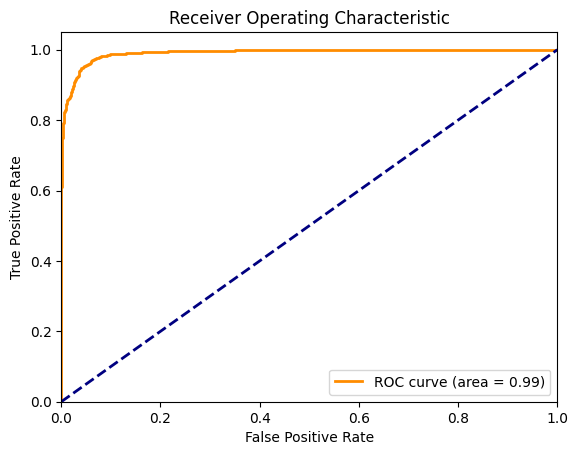

435/435 [==============================] - 1s 3ms/step - loss: 0.1248 - accuracy: 0.9503 - val_loss: 0.1208 - val_accuracy: 0.9560
Epoch 2/10
145/145 [==============================] - 0s 846us/steps: 0.1197 - accuracy: 
Epoch 2 - Test ROC AUC: 0.9919


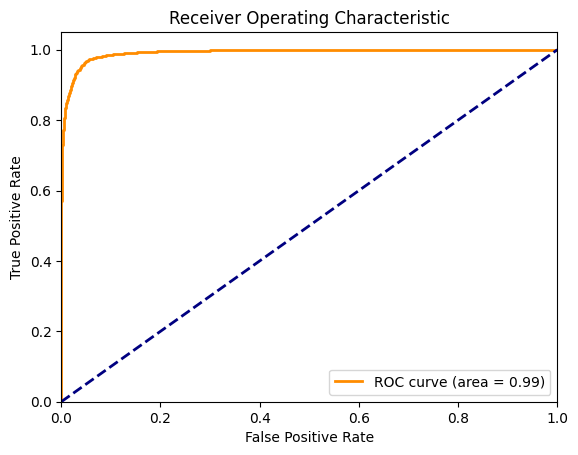

435/435 [==============================] - 1s 3ms/step - loss: 0.1193 - accuracy: 0.9518 - val_loss: 0.1102 - val_accuracy: 0.9553
Epoch 3/10
145/145 [==============================] - 0s 817us/steps: 0.1242 - accuracy: 
Epoch 3 - Test ROC AUC: 0.9903


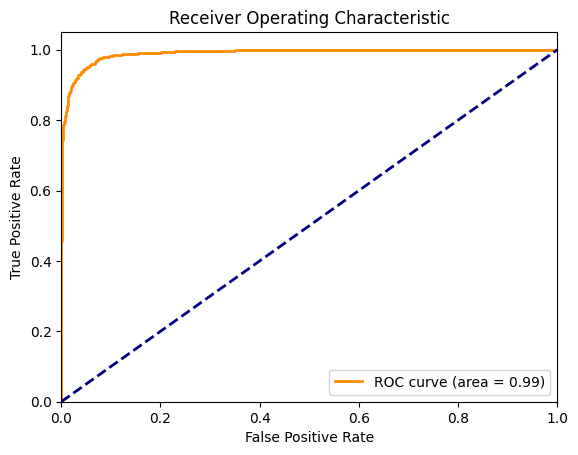

435/435 [==============================] - 1s 3ms/step - loss: 0.1247 - accuracy: 0.9509 - val_loss: 0.1406 - val_accuracy: 0.9461
Epoch 4/10
145/145 [==============================] - 0s 853us/steps: 0.1214 - accuracy: 
Epoch 4 - Test ROC AUC: 0.9932


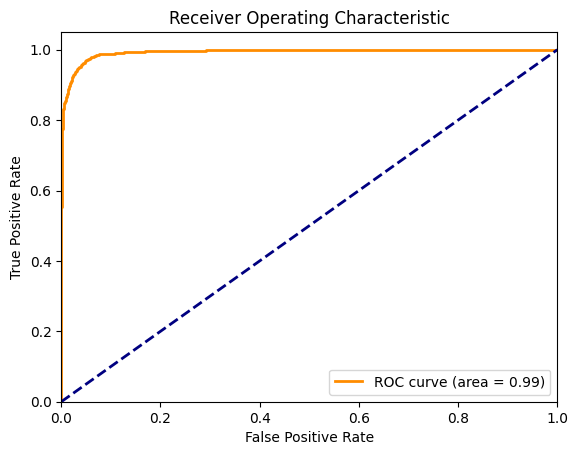

435/435 [==============================] - 1s 3ms/step - loss: 0.1222 - accuracy: 0.9522 - val_loss: 0.1140 - val_accuracy: 0.9599
Epoch 5/10
145/145 [==============================] - 0s 823us/steps: 0.1198 - accuracy: 
Epoch 5 - Test ROC AUC: 0.9929


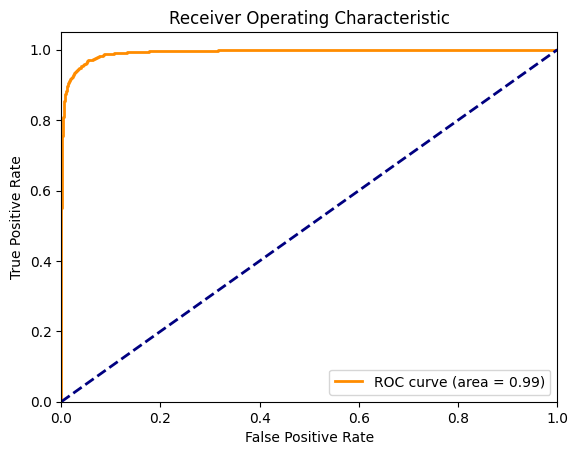

435/435 [==============================] - 1s 3ms/step - loss: 0.1193 - accuracy: 0.9528 - val_loss: 0.1585 - val_accuracy: 0.9355
Epoch 6/10
145/145 [==============================] - 0s 799us/steps: 0.1269 - accuracy: 
Epoch 6 - Test ROC AUC: 0.9919


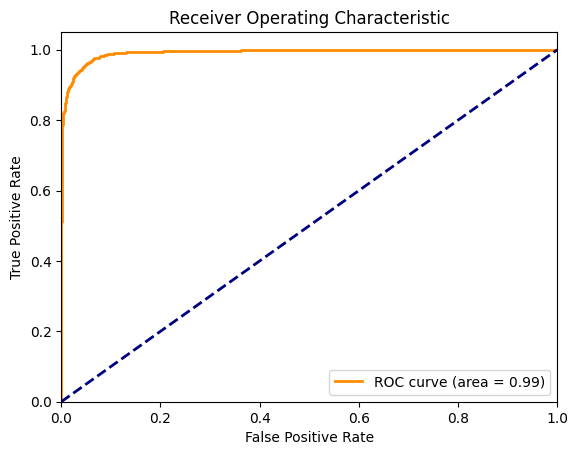

435/435 [==============================] - 1s 3ms/step - loss: 0.1266 - accuracy: 0.9492 - val_loss: 0.1236 - val_accuracy: 0.9519
Epoch 7/10
145/145 [==============================] - 0s 763us/steps: 0.1241 - accuracy: 
Epoch 7 - Test ROC AUC: 0.9925


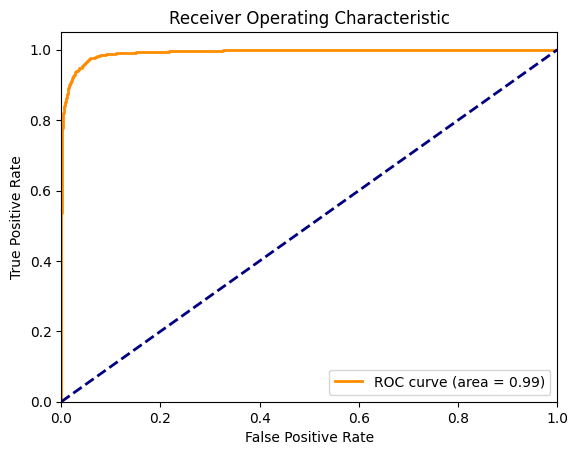

435/435 [==============================] - 1s 3ms/step - loss: 0.1252 - accuracy: 0.9497 - val_loss: 0.1251 - val_accuracy: 0.9514
Epoch 8/10
145/145 [==============================] - 0s 878us/steps: 0.1232 - accuracy: 
Epoch 8 - Test ROC AUC: 0.9927


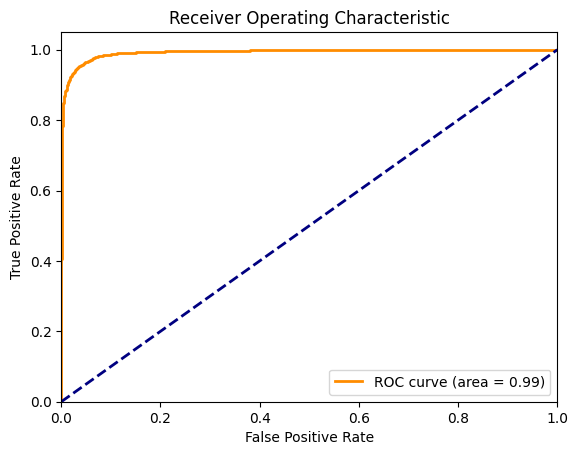

435/435 [==============================] - 1s 3ms/step - loss: 0.1231 - accuracy: 0.9507 - val_loss: 0.1364 - val_accuracy: 0.9443
Epoch 9/10
145/145 [==============================] - 0s 847us/steps: 0.1185 - accuracy: 
Epoch 9 - Test ROC AUC: 0.9934


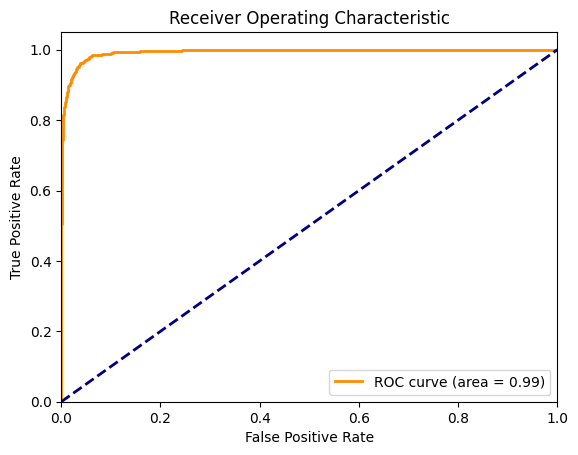

435/435 [==============================] - 1s 3ms/step - loss: 0.1209 - accuracy: 0.9503 - val_loss: 0.1097 - val_accuracy: 0.9588
Epoch 10/10
145/145 [==============================] - 0s 886us/steps: 0.1178 - accuracy: 
Epoch 10 - Test ROC AUC: 0.9928


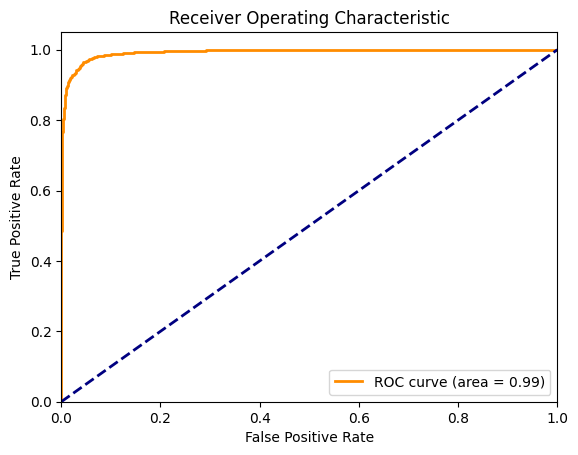

435/435 [==============================] - 1s 3ms/step - loss: 0.1173 - accuracy: 0.9537 - val_loss: 0.1563 - val_accuracy: 0.9366


In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback

class RocAucCallback(Callback):
    def __init__(self, test_data):
        self.x_test = test_data[0]
        self.y_test = test_data[1]

    def on_epoch_end(self, epoch, logs=None):
        y_pred_test = self.model.predict(self.x_test)
        print("Resultat")
        print(y_pred_test)
        roc_auc_test = roc_auc_score(self.y_test, y_pred_test)
        print("Koresultat")
        print(roc_auc_score)
        print(f"Epoch {epoch + 1} - Test ROC AUC: {roc_auc_test:.4f}")
        fpr, tpr, _ = roc_curve(self.y_test, y_pred_test)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()  

# Création de l'instance de RocAucCallback
roc_auc_callback = RocAucCallback(test_data=(X_testEx, test_labels ))

# Entraînement du modèle avec le callback
history = model.fit(X_trainEx, train_labels, epochs=10, batch_size=32, validation_data=(X_evalEx, eval_labels), callbacks=[roc_auc_callback])



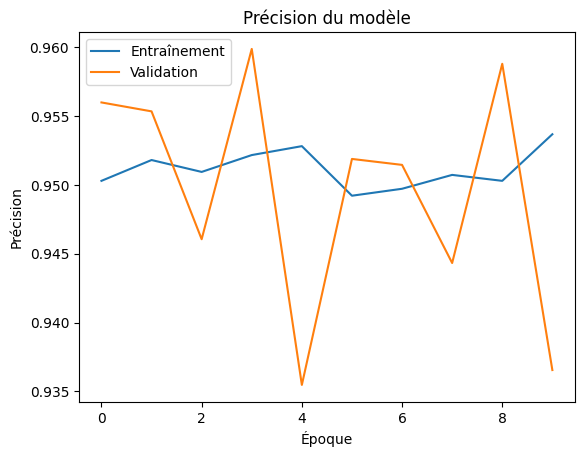

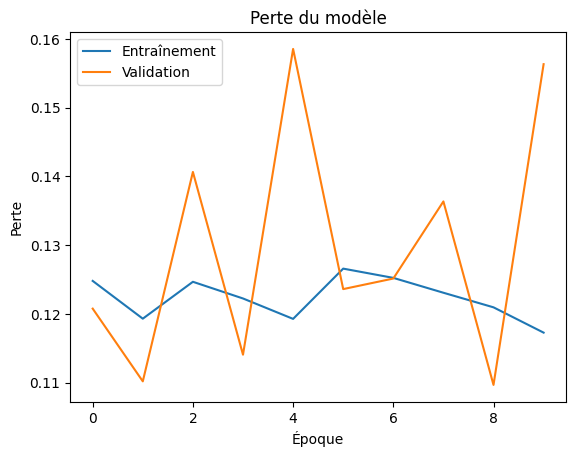

In [59]:
import matplotlib.pyplot as plt

# Tracer la précision
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Époque')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()

# Tracer la perte
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte du modèle')
plt.ylabel('Perte')
plt.xlabel('Époque')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()


In [169]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout


# Définir le modèle
model_rnn = Sequential()
model_rnn.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_trainEx.shape[1], X_trainEx.shape[2])))
model_rnn.add(Bidirectional(LSTM(32)))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Afficher un résumé du modèle
model_rnn.summary()

# Entraîner le modèle
model_rnn.fit(X_trainEx, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[roc_auc_callback])

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_24 (Bidirect  (None, 40, 128)           33792     
 ional)                                                          
                                                                 
 bidirectional_25 (Bidirect  (None, 64)                41216     
 ional)                                                          
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 75073 (293.25 KB)
Trainable params: 75073 (293.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
290/290 [==============================] - 6s 14ms/step
Epoch 1 - Test ROC AUC: 0.8777
348/348 [==============================] - 31s 61

In [157]:
class RocAucCallback(keras.callbacks.Callback):
    def __init__(self, training_data, validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_epoch_end(self, epoch, logs=None):
        y_pred_train = self.model.predict(self.x).squeeze()
        roc_train = roc_auc_score(self.y, y_pred_train, multi_class='ovr')

        

        y_pred_val = self.model.predict(self.x_val).squeeze()
        roc_val = roc_auc_score(self.y_val, y_pred_val, multi_class='ovr')

        print(f'\nTrain ROC AUC: {roc_train:.4f}')
        print(f'Validation ROC AUC: {roc_val:.4f}')

class RocAucCallbackRNN(Callback):
    def __init__(self, test_data):
        self.x_test = test_data[0]
        self.y_test = test_data[1]

    def on_epoch_end(self, epoch, logs=None):
        y_pred_test = self.model.predict(self.x_test).squeeze()
        
        # Convertissez les probabilités prédites en classes binaires (0 ou 1)
        y_pred_test_binary = (y_pred_test > 0.5).astype(int)

        roc_auc_test = roc_auc_score(self.y_test, y_pred_test_binary)

        print(f"Epoch {epoch + 1} - Test ROC AUC: {roc_auc_test:.4f}")








In [158]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Attention
import numpy as np
from tensorflow import keras

from keras.layers import Bidirectional, LSTM, Dense, Attention



from keras.models import Model
from keras.layers import Input, Bidirectional, LSTM, Dense, Attention

# Entrée du modèle
inputs = Input(shape=(X_trainEx.shape[1], X_trainEx.shape[2]))

# Couche LSTM bidirectionnelle
lstm = Bidirectional(LSTM(64, return_sequences=True))(inputs)

# Couche d'attention personnalisée
attention = Attention()([lstm, lstm])

# Concaténation de la sortie de la couche LSTM avec l'attention
attended_lstm = keras.layers.Concatenate(axis=-1)([lstm, attention])

# Couche Dense
dense = Dense(1, activation='sigmoid')(attended_lstm)

# Création du modèle
model_rnn_attention = Model(inputs=inputs, outputs=dense)



# Compiler le modèle

model_rnn_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Afficher un résumé du modèle 

# il faut tester la taille chaque lables si il est de forme (None, 1) ça devrait fonctionner
model_rnn_attention.summary()

# Entraîner le modèle
# Reshape des étiquettes pour roc_auc_score
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

# Instancier la classe RocAucCallback
#roc_auc_callback_rnn = RocAucCallback(training_data=(X_trainEx, y_train_reshaped), validation_data=(X_testEx, y_test_reshaped))
# Création de l'instance de RocAucCallback
roc_auc_callbackR = RocAucCallbackRNN(test_data=(X_testEx, y_test_reshaped))

# Entraîner le modèle avec le callback ROC AUC
model_rnn_attention.fit(X_trainEx, y_train_reshaped, epochs=10, batch_size=32, validation_split=0.2, callbacks=[roc_auc_callbackR])





Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_14 (InputLayer)       [(None, 40, 1)]              0         []                            
                                                                                                  
 bidirectional_23 (Bidirect  (None, 40, 128)              33792     ['input_14[0][0]']            
 ional)                                                                                           
                                                                                                  
 attention_17 (Attention)    (None, 40, 128)              0         ['bidirectional_23[0][0]',    
                                                                     'bidirectional_23[0][0]']    
                                                                                           

ValueError: multi_class must be in ('ovo', 'ovr')

In [146]:
#Affichage du spectre fréquenciel du signal
plt.figure(figsize=(10, 10))
lr.display.specshow(lr.amplitude_to_db(tf_sig, ref=np.max),
                    sr=sr, 
                    y_axis='log', 
                    x_axis='time', 
                    cmap='cividis')  # Changez 'cividis' par votre couleur préférée
plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")
plt.colorbar(format='%+2.0f dB')
plt.show()

(16217, 1)
(6951, 1)
